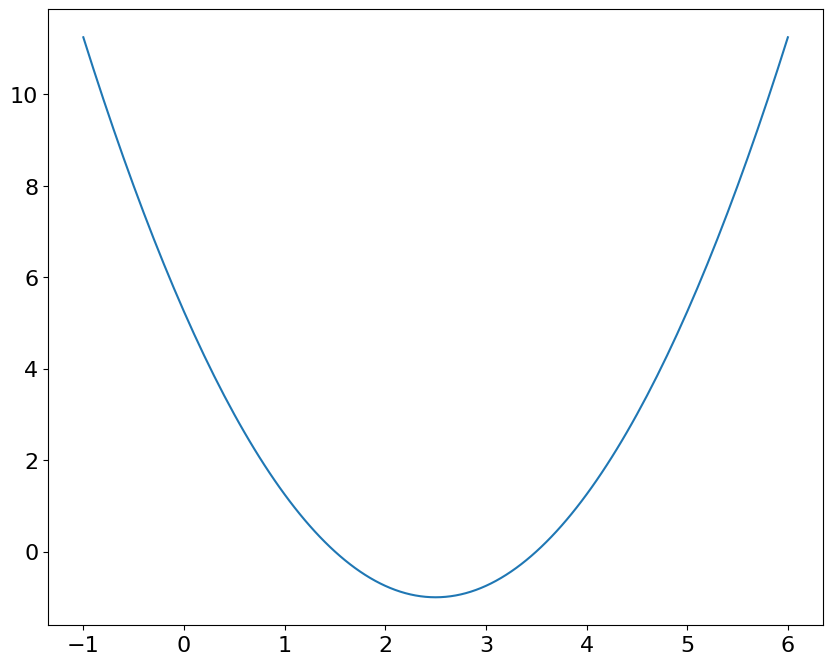

In [44]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plot_x = np.linspace(-1, 6, 141)
plot_y = (plot_x - 2.5) ** 2 - 1
plt.plot(plot_x, plot_y)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [45]:
def dJ(theta):
    return 2 * (theta - 2.5)

def J(theta):
    return (theta - 2.5) ** 2 - 1

theta_history = []
def gradient_descent(initial_theta, eta, epsilon=1e-8):
    theta = initial_theta
    theta_history.append(initial_theta)
    while True:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - eta * gradient
        theta_history.append(theta)
        if abs(J(theta) - J(last_theta)) < epsilon:
            break
    return theta

def plot_theta_history():
    plt.figure(figsize=(10, 8))
    plt.plot(plot_x, J(plot_x))
    plt.plot(np.array(theta_history), J(np.array(theta_history)), color='r', marker='+')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

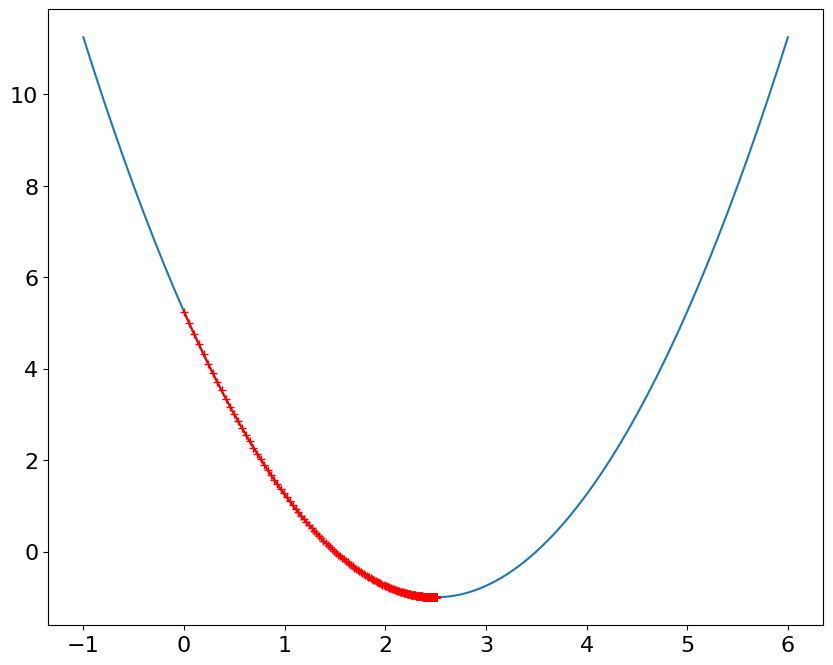

In [46]:
eta = 0.01
theta_history = []
gradient_descent(0., eta)
plot_theta_history()

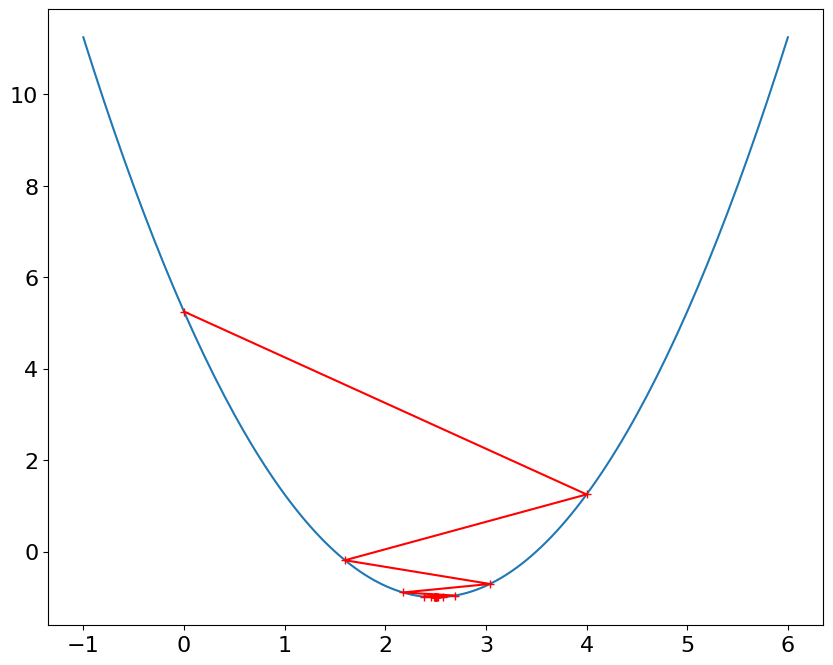

In [47]:
eta = 0.8
theta_history = []
gradient_descent(0., eta)
plot_theta_history()

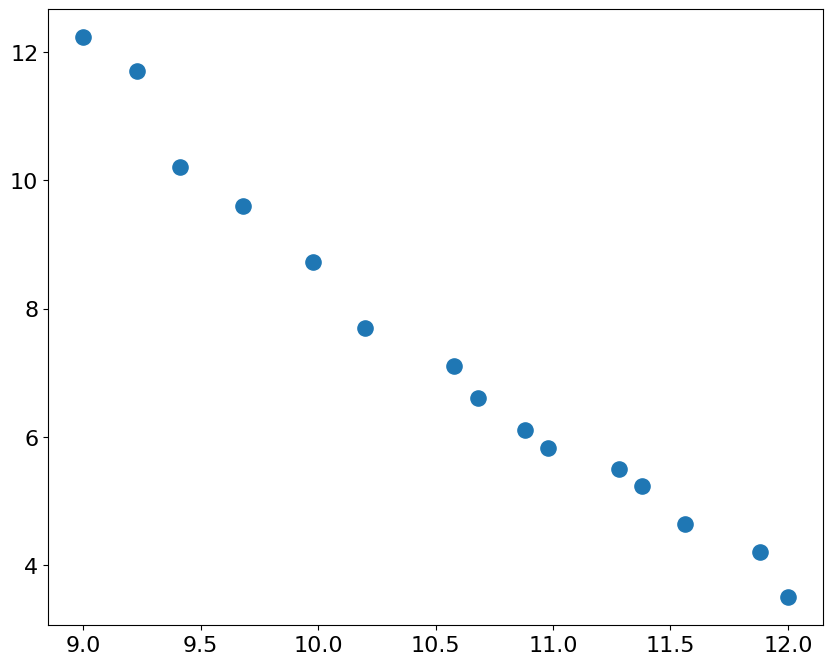

In [48]:
x = [9, 9.23, 9.41, 9.68, 9.98, 10.20, 10.58, 10.68, 10.88, 10.98, 11.28, 11.38, 11.56, 11.88, 12.00]
y = [12.23, 11.7, 10.21, 9.60, 8.72, 7.70, 7.10, 6.61, 6.10, 5.82, 5.50, 5.23, 4.65, 4.20, 3.50]

x = np.array(x)
y = np.array(y)

plt.figure(figsize=(10, 8))
plt.scatter(x, y, s=120)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [49]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
    except:
        return float('inf')
    
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:, i])
    return res * 2 / len(X_b)

def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e8, epsilon=1e-8):
    theta = initial_theta
    cur_iter = 0
    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon:
            break
        cur_iter += 1
    return theta

In [50]:
X = x.reshape(-1, 1)

X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.007

theta = gradient_descent(X_b, y, initial_theta, eta)
print(theta)

[36.48556952 -2.76223832]


In [51]:
def fit_gd(X_train, y_train, eta=0.01, n_iters=1e10):
    assert X_train.shape[0] == y_train.shape[0], 'the size of X_train must be equal to the size of y_train'
    
    def J(theta, X_b, y):
        try:
            return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
        except:
            return float('inf')
        
    def dJ(theta, X_b, y):
        return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(y)
    
    def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e10, epsilon=1e-8):
        theta = initial_theta
        cur_iter = 0
        while cur_iter < n_iters:
            gradient = dJ(theta, X_b, y)
            last_theta = theta
            theta = theta - eta * gradient
            if abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon:
                break
            cur_iter += 1
        return theta
    
    X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
    initial_theta = np.zeros(X_b.shape[1])
    theta = gradient_descent(X_b, y_train, initial_theta, eta, n_iters)
    return theta

In [52]:
theta = fit_gd(X, y, eta=0.007)
print(theta)

[36.48556952 -2.76223832]


In [53]:
def fit_sgd(X_train, y_train, eta=0.01, n_iters=10000):
    assert X_train.shape[0] == y_train.shape[0], 'the size of X_train must be equal to the size of y_train'

    def J(theta, X_b, y):
        try:
            return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
        except:
            return float('inf')

    def dJ_sgd(theta, x_b, y):
        return 2 * x_b.T.dot(x_b.dot(theta) - y)

    def sgd(X_b, y, initial_theta, eta, n_iters=50):
        theta = initial_theta
        m = len(X_b)
        for epoch in range(n_iters):
            indices = np.random.permutation(m)
            X_b_shuffled = X_b[indices]
            y_shuffled = y[indices]
            for i in range(m):
                xi = X_b_shuffled[i:i+1]  # shape (1, n)
                yi = y_shuffled[i]
                gradient = dJ_sgd(theta, xi, yi)
                theta = theta - eta * gradient
        return theta

    X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
    initial_theta = np.zeros(X_b.shape[1])
    theta = sgd(X_b, y_train, initial_theta, eta, n_iters)
    return theta

In [54]:
theta = fit_sgd(X, y, eta=0.007)
print(theta)

[36.50282303 -2.70258877]


In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
print(f'mean: {scaler.mean_}')
print(f'scale: {scaler.scale_}')
x_scaled = scaler.transform(X)
print(x_scaled)

mean: [10.58133333]
scale: [0.93305853]
[[-1.69478471e+00]
 [-1.44828356e+00]
 [-1.25536962e+00]
 [-9.65998706e-01]
 [-6.44475468e-01]
 [-4.08691760e-01]
 [-1.42899217e-03]
 [ 1.05745420e-01]
 [ 3.20094246e-01]
 [ 4.27268658e-01]
 [ 7.48791896e-01]
 [ 8.55966309e-01]
 [ 1.04888025e+00]
 [ 1.39183837e+00]
 [ 1.52044767e+00]]


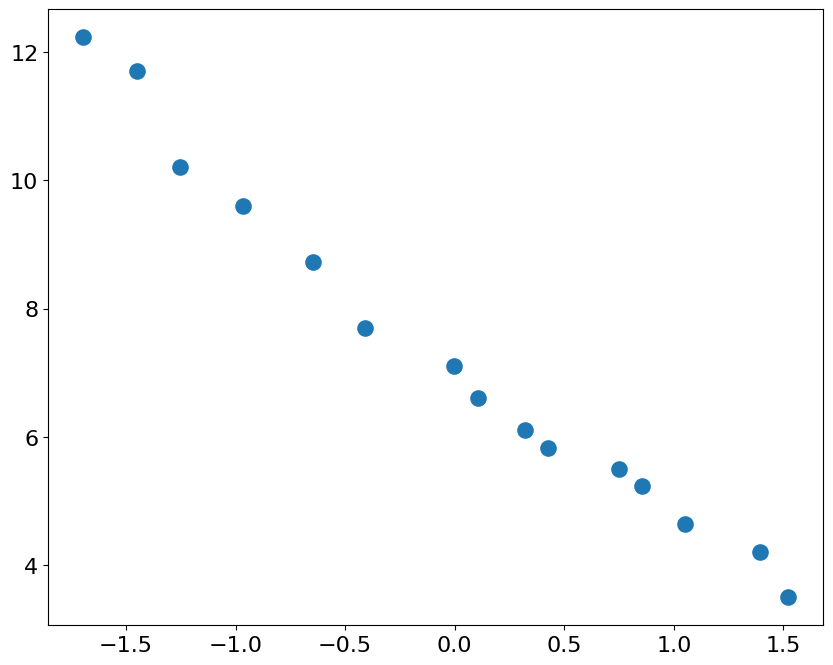

In [56]:
plt.figure(figsize=(10, 8))
plt.scatter(x_scaled.reshape(1, -1), y, s=120)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [57]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-6, penalty=None, eta0=0.01, learning_rate='constant', random_state=42)
sgd_reg.fit(x_scaled, y)

print(sgd_reg.intercept_, sgd_reg.coef_)

coef_sgd = sgd_reg.coef_[0] / scaler.scale_[0]
intercept_sgd = y.mean() - coef_sgd * x.mean()

print("---------------------------")
print(f"coef_: {coef_sgd:.5f}")
print(f"intercept_: {intercept_sgd:.5f}")

[7.25214306] [-2.58276785]
---------------------------
coef_: -2.76807
intercept_: 36.54783


In [74]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

diabetes = datasets.load_diabetes()
x_train, x_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(x_train[0:1])

(353, 10)
(89, 10)
[[ 0.07076875  0.05068012  0.01211685  0.0563009   0.03420581  0.04941617
  -0.03971921  0.03430886  0.02736405 -0.0010777 ]]


In [72]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-6, penalty=None, eta0=0.01, learning_rate='constant', random_state=42)
sgd_reg.fit(x_train, y_train)
print(sgd_reg.score(x_test, y_test))

0.44173624604890327


In [59]:
np.random.seed(666)
X = np.random.random(size=(1000, 10))
true_theta = np.arange(1, 12, dtype=float)
X_b = np.hstack([np.ones((len(X), 1)), X])
y = X_b.dot(true_theta)
print(X.shape)
print(y.shape)
print(true_theta)

(1000, 10)
(1000,)
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]


In [60]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
    except:
        return float('inf')

In [61]:
def dJ_math(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(y)

In [62]:
def dJ_debug(theta, X_b, y, epsilon=0.01):
    res = np.empty(len(theta))
    for i in range(len(theta)):
        theta_1 = theta.copy()
        theta_1[i] += epsilon
        theta_2 = theta.copy()
        theta_2[i] -= epsilon
        res[i] = (J(theta_1, X_b, y) - J(theta_2, X_b, y)) / (2 * epsilon)
    return res

In [63]:
def gradient_descent(dJ, X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):
    theta = initial_theta
    cur_iter = 0
    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon:
            break
        cur_iter += 1
    return theta

In [64]:
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

In [40]:
theta_debug = gradient_descent(dJ_debug, X_b, y, initial_theta, eta)
print(theta_debug)

[ 1.06327243  1.99165926  2.98607099  3.98510174  4.98769821  5.9892096
  6.98616563  7.98989283  8.98539625  9.98886542 10.98654483]


In [41]:
theta_math = gradient_descent(dJ_math, X_b, y, initial_theta, eta)
print(theta_math)

[ 1.06327243  1.99165926  2.98607099  3.98510174  4.98769821  5.9892096
  6.98616563  7.98989283  8.98539625  9.98886542 10.98654483]
